In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer # 데이터 셋

cancer = load_breast_cancer()                     # x,y따로 구분해줌
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [7]:
import torch                        # Tensor 연산
import torch.nn as nn               # 레이어
import torch.nn.functional as F     # 활성화/ 손실함수
import torch.optim as optim         # 최적화 함수 SGD,Adam

In [8]:
data = torch.FloatTensor(df.values) # df 을 실수형 tensor 로 변환

data.size()  # (샘플 수, 특성 수) 형태

torch.Size([569, 31])

In [9]:
x = data[:,:-1]
y = data[:,-1:]
print(x.size())
print(y.size())

torch.Size([569, 30])
torch.Size([569, 1])


In [10]:
# 학습 / 검증 / 테스트 데이터 비유ㅗㄹ 
ratios = [.6, .2, .2]

In [11]:
# 전체 데ㅔ이터 (data.size(0))를 ratios 비율에 따라 학습/검증/테스트 데이터 갯수로 분할
train_cnt = int(data.size(0)*ratios[0]) # 전체 샘플수 * 학습 데이터 비율
valid_cnt = int(data.size(0)*ratios[1]) # 전체 샘플수 * 검증 데이터 비율
test_cnt = data.size(0) - train_cnt - valid_cnt # 남은 샘플은 테스트 데이터로 할당

cnts = [train_cnt, valid_cnt, test_cnt]     # 데이터 분할 갯수 리스트 
valid_cnt = int(data.size(0)*ratios[1]) # 전체 샘플수 * 검증 데이터 비율
print(f"학습 데이터 셋: {train_cnt}, 검증 데이터 셋:{valid_cnt}, 테스트 데이터 셋:{test_cnt}")

학습 데이터 셋: 341, 검증 데이터 셋:113, 테스트 데이터 셋:115


torch.randperm(n) : 0 ~ n-1 까지의 숫자를 무작위로 섞은 센터를 반환

In [12]:
# 데이터를 무작위로 섞은 후 , 설정한 비율에 따라 학습/검증/테스트 셋으로 나눔
indices = torch.randperm(data.size(0)) # 전체 샘플 인덱스 를 무작위로 섞음

# 무작위로 생성된 indices를 이요ㅕㅇ해서 x, y 를 인덱스 순으로 셔플
x = torch.index_select(x, dim=0, index = indices) # 섞인 인덱스 순서대로 x 재정렬
y = torch.index_select(y, dim=0, index = indices) # 섞인 인덱스 순서대로 x 재정렬

x = x.split(cnts, dim=0) # x를 train/ valid / test 개수 기준으로 나눔
y = y.split(cnts, dim=0) # y를 train/ valid / test 개수 기준으로 나눔

for x_i, y_i in zip(x, y):          # 각 데이터 쌍으로 순회 (zip 함수 출력 결과는 tuple)
    print(x_i.size(),y_i.size())    # 분힐된 데이터 크기 확인

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


In [13]:
print(x[0]) # 학습 데이터 X
print(y[0]) # 학습 데이터 Y


tensor([[2.0480e+01, 2.1460e+01, 1.3250e+02,  ..., 1.4450e-01, 2.2380e-01,
         7.1270e-02],
        [1.3870e+01, 1.6210e+01, 8.8520e+01,  ..., 5.5560e-02, 2.3620e-01,
         7.1130e-02],
        [1.1220e+01, 1.9860e+01, 7.1940e+01,  ..., 2.0220e-02, 3.2920e-01,
         6.5220e-02],
        ...,
        [1.3900e+01, 1.6620e+01, 8.8970e+01,  ..., 6.2220e-02, 2.6790e-01,
         7.6980e-02],
        [1.4270e+01, 2.2550e+01, 9.3770e+01,  ..., 1.3620e-01, 2.6980e-01,
         8.3510e-02],
        [1.4110e+01, 1.2880e+01, 9.0030e+01,  ..., 5.8900e-02, 2.1000e-01,
         7.0830e-02]])
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]

- 학습 데이터 x[0]에 대해 fit()호출하여 스케일 기준(평균,표준편차)를 학습
- 학습/검증/테스트 데이터를 동일한 기준으로 정규화(transform())
- 각각 다시 torch.FloatTensor()로 Tensor 변환 하여 모델 입력에 사용할 수 있도록 함
- 정규화된 학습 데이터를 DataFrame으로 변환

In [14]:
#StandardScaler()로 정규화(전처리) 진행
scaler = StandardScaler()       # 평균 0, 표준편차 1 스케일링 객체 생성
scaler.fit(x[0].numpy())        # 학습 데이터 기준으로 스케일 기준 학습

x = [
    torch.FloatTensor(scaler.transform(x[0].numpy())),          # train 데이터 표준화
    torch.FloatTensor(scaler.transform(x[1].numpy())),          # validation 데이터 표준화
    torch.FloatTensor(scaler.transform(x[2].numpy()))           # test 데이터 표준화
]

df = pd.DataFrame(x[0].numpy(),columns=cancer.feature_names)   # 스케일링 된 train 데이터를 DataFrame으로 변환

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.723026,0.475132,1.589098,1.743975,-0.938906,-0.422337,-0.015743,0.254644,-1.285492,-1.538004,...,1.580793,0.057759,1.563536,1.456224,-0.378899,-0.157102,0.207653,0.448047,-1.040791,-0.689721
1,-0.121180,-0.797849,-0.189893,-0.215424,-0.652918,-0.953485,-0.951083,-0.744902,-1.441427,-0.560246,...,-0.276552,-0.041140,-0.347322,-0.356283,-0.709244,-1.001223,-1.093290,-0.916397,-0.844517,-0.697169
2,-0.860536,0.087176,-0.860554,-0.783191,0.671618,-0.714134,-1.075307,-1.082750,0.429785,-0.359431,...,-0.914696,-0.007614,-0.930639,-0.799794,0.484400,-1.027849,-1.288716,-1.458554,0.627533,-1.011616
3,0.919499,0.928556,1.043023,0.848588,-0.250471,1.752097,1.512309,1.270450,-0.455052,1.497756,...,1.040511,0.510346,1.031108,0.918791,-0.471396,1.445626,1.200614,1.293346,-0.941071,2.030692
4,0.062962,-1.338562,0.026110,-0.076509,1.003304,-0.256075,-0.282079,0.374823,-0.621865,-0.230633,...,-0.135875,-1.491094,-0.160236,-0.260987,0.145247,-0.696744,-0.675475,-0.128781,-0.458302,-0.326325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.155033,-0.620843,0.067773,0.004640,-0.519507,-0.659271,-0.722334,-0.544434,-0.901096,-0.809533,...,-0.031897,-0.885968,-0.183769,-0.213597,-0.422945,-0.650100,-0.751171,-0.545907,-0.586513,-0.849338
337,-0.584323,-1.311890,-0.583876,-0.577706,-1.120965,-0.519975,-0.289026,-0.631583,-0.636371,-0.184930,...,-0.680234,-1.095499,-0.614712,-0.638736,-1.268627,-0.079363,0.167083,-0.366569,-0.345920,0.213182
338,-0.112810,-0.698434,-0.171691,-0.199745,-2.064430,-0.985659,-0.861519,-0.935207,-0.030766,-1.040815,...,-0.270436,-0.674761,-0.216127,-0.314215,-1.654469,-0.354690,-0.670032,-0.814225,-0.342754,-0.385915
339,-0.009579,0.739427,0.022469,-0.116120,0.553685,0.171299,0.677450,0.284371,0.379015,-0.423138,...,-0.239854,1.415520,-0.124937,-0.298075,0.290598,0.116281,0.740003,0.320715,-0.312680,-0.038482


### 모델 과 옵티마이저 구성
- 입력층 : 특성 수 30개
- 은닉층 : 25 -> 20 -> 15 -> 10 -> 5 노드로 감소
- 각 은닉층 사이에는 LeakeyReLU 활성화 함수 적용
- 출력층 : 1개 노드
- 출력층 활성화 함수: Sigmoid 적용하여 이진 분류 확률값 출력(0~1)

In [ ]:

model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),  # 입력 특성 수 -> 은닉층(25)
    nn.LeakyReLU(),                 # 음수 영역도 기울기 유지 LeakyReLU 사용
    nn.Linear(25, 20),             # 첫 번째 은닉층(20)
    nn.LeakyReLU(),
    
    nn.Linear(20, 15),             # 두 번째 은닉층(15)
    nn.LeakyReLU(),
    
    nn.Linear(15, 10),             # 세 번째 은닉층(10)
    nn.LeakyReLU(),
    
    nn.Linear(10, 5),              # 네 번째 은닉층(5)
    nn.LeakyReLU(),
    
    nn.Linear(5, y[0].size(-1)),   # 은닉충 노드 5-> 출력 노드 1개 (이진 분류)
    nn.Sigmoid(),                  # 출력값을 0~1 확률로 반전
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=25, out_features=20, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Linear(in_features=20, out_features=15, bias=True)
  (6): LeakyReLU(negative_slope=0.01)
  (7): Linear(in_features=15, out_features=10, bias=True)
  (8): LeakyReLU(negative_slope=0.01)
  (9): Linear(in_features=10, out_features=5, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): Linear(in_features=5, out_features=1, bias=True)
  (12): Sigmoid()
)

모델의 학습 가능한 파라미터(model.parameters())을 대상으로 Adam 옵티마이저를 사용해 학습한다.

In [16]:
optimizer = optim.Aoptimizer = optim.Adam(model.parameters())  #Adam 옵티마이저로 모델 가중치 업데이트dam(model.parameters()) # Adam 옵티 마이저로 모델 가중치 업데이트


Adam 옵티마이저 : 학습률을 자동으로 조절해주는 대표적인 옵티마이저
model.parameters() : 업데이트할 모든가중치

학습

- 하이퍼 파라미터 설정
    - n_epochs : 전체 학습 반복횟수
    - batch_size : 한번에 학습할 샘 플 수(미니배치 크기)
    - print_interval : 몇 에폭마다 학습 상태(loss등)를 출력할지 설정 
    - early_stop : 얼리 스탑 기준. 성능 개선이 기준동안 없는 경우 학습을 중단할 최데 대기 에폭 수 
    

In [ ]:
n_epochs = 10000
batch_size = 32
print_interval = 100
early_stop = 

deepcopy : 객체를 완전히 복사 (참조 공유 방지)

In [18]:
# 모델의 최적 상태를 추적하고 저장하기 위한 초기 설정 
from copy import deepcopy # 모델 구조와 가중치를 완전히 복사할때 사용 (best_model 저장용)

lowest_loss = np.inf      # 최소 손실값 초기화 ( 아주 큰 값으로 초기화 )|}
best_model = None         # 가장 성능 좋은 모델 저장용 변수

lowest_loss = np.inf     # 최소 손실이 나온 epoc 기록 ( 아주 큰 값으로 초기화)

In [32]:
# 학습 루프 
train_history, valid_history = [] , [] # 학습/검증 손실 기록 리스트

for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0)) # 학습 데이터 인덱스 셔플
    x_ = torch.index_select(x[0], dim = 0 , index = indices) # 셔플 된 x
    y_ = torch.index_select(y[0], dim = 0 , index = indices) # 셔플 된 y

    x_ = x_.split(batch_size,dim= 0) # 배치 크기 (32) 단위로 분할
    y_ = y_.split(batch_size,dim= 0) # 배치 크기 (32) 단위로 분할

    train_loss, valid_loss = 0, 0.  # epch별 손실 초기화
    y_hat = []                      # 검증 예측값 저장용 리스트

    # 미니 배치 단위로 학습 루프
    for x_i, y_i in zip(x_,y_):
        y_hat_i = model(x_i)         #순전파
        loss = F.binary_cross_entropy(y_hat_i, y_i) # 이진 분류 손실 계산

        optimizer.zero_grad()       # 이전 기울기 초기화
        loss.backward()             # 역전파(backpropagation)

        optimizer.step()            # 가중치 업데이트
        train_loss += float(loss)   # Tensor -> Float (메모리 누수 방지)


    train_loss = train_loss / len(x_) # 평균 학습 손실 계산 

    with torch.no_grad():                   # 검증 단계 (gradient 계산안함)
        x_ = x[1].split(batch_size, dim= 0) # 검증 데이터 배치 분할
        y_ = y[1].split(batch_size, dim= 0) # 검증 데이터 배치 분할

        vaild_loss = 0
        # 검증 데이터를 순회 (미니 배치 단위)
        for x_i, y_i in zip(x_,y_):
            y_hat_i = model(x_i)        # 검증용 순전파
            loss = F.binary_cross_entropy(y_hat_i,y_i)  # 검증 손실 계산

            vaild_loss += float(loss)   # 손실 누적

            y_hat += [y_hat_i]          # 예측값 저장

    valid_loss = valid_loss / len(x_)   # 평균 검증 손실 계산


    train_history += [train_loss]    # 평균 학습 손실 누적
    valid_history += [valid_loss]    # 평균 검증 손실 누적 

    # 100 epoch 마다 각종 손실 지표 및 가장 낮은 손실 출력 
    if (i + 1) % print_interval == 0:
        print(f"Epoch: {i+1}, train_loss: {train_loss:.4e}, valid_loss: {vaild_loss:.4e}, lowest_loss:{lowest_loss:.4e}")
        

    if valid_loss <= lowest_loss :          # 검증 손실이 개선될때
        lowest_loss = valid_loss            # 최소 손실 갱신
        lowest_epoch = i                      # 해당 epoch 저장


        best_model = deepcopy(model.state_dict()) # 최적 모델 가중치 저장

    else:
        # early_stop 설정 and 최고 성능 이후 허용 대기 시간 < 현재 인덱스 일 경우 학습 종료
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print(f"{early_stop}epoch동안 개선된 사항이 없음")
        break

print(f"epoch {lowest_epoch + 1}에서 최고 성능의 검증 손실은? {lowest_loss}")

model.load_state_dict(best_model) #최고 성능 모델을 복원

Epoch: 100, train_loss: 5.2946e-05, valid_loss: 6.3869e-02, lowest_loss:0.0000e+00
Epoch: 200, train_loss: 2.5557e-06, valid_loss: 2.8133e-01, lowest_loss:0.0000e+00
Epoch: 300, train_loss: 1.4231e-06, valid_loss: 1.2634e+00, lowest_loss:0.0000e+00
Epoch: 400, train_loss: 8.1702e-17, valid_loss: 7.6070e-01, lowest_loss:0.0000e+00
Epoch: 500, train_loss: 4.5931e-14, valid_loss: 1.5360e+00, lowest_loss:0.0000e+00
Epoch: 600, train_loss: 5.4673e-06, valid_loss: 2.4413e+00, lowest_loss:0.0000e+00
Epoch: 700, train_loss: 2.4587e-07, valid_loss: 3.1252e+00, lowest_loss:0.0000e+00
Epoch: 800, train_loss: 5.2154e-08, valid_loss: 9.9697e-01, lowest_loss:0.0000e+00
Epoch: 900, train_loss: 2.9802e-08, valid_loss: 9.8358e-01, lowest_loss:0.0000e+00
Epoch: 1000, train_loss: 2.9802e-08, valid_loss: 1.7953e+00, lowest_loss:0.0000e+00
Epoch: 1100, train_loss: 2.1979e-07, valid_loss: 1.6389e+00, lowest_loss:0.0000e+00
Epoch: 1200, train_loss: 3.3922e-19, valid_loss: 1.6327e+00, lowest_loss:0.0000e+00
E

<All keys matched successfully>

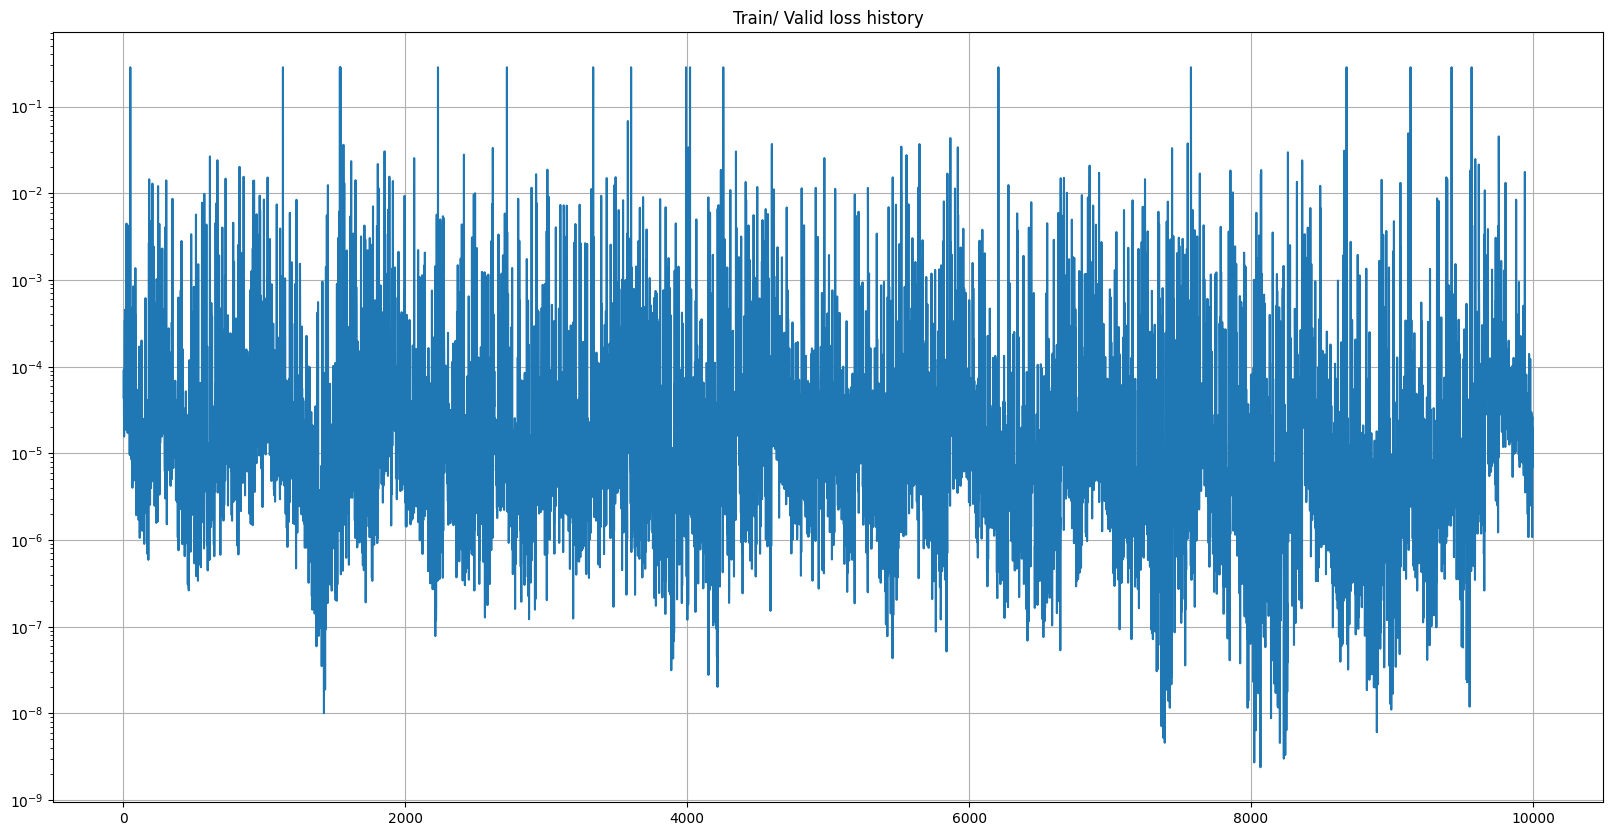

In [22]:
# 손실 기록 또는 손길 변화 이력 시각화
plot_from = 2 # 초반 epoc 건너뛰고 3번째 에폭 부터 그래프 표시

plt.figure(figsize= (20,10))
plt.grid()
plt.title("Train/ Valid loss history")
plt.plot(
    range(plot_from,len(train_history)),train_history[plot_from:],
    range(plot_from,len(valid_history)),valid_history[plot_from:]
)

plt.yscale('log') # y출을 로그로 표시
plt.show()

In [25]:
# 결과 확인 : 테스트 데이터에서 얼마나 잘 예측하는지 평가
test_loss = 0
y_hat = []  # 전체 테스트 예측값 저장용 리스트

with torch.no_grad():       # 테스트(그레디언트 계산 차단)
    x_ = x[2].split(batch_size, dim=0)  # 테스트 데이터 배치 분할
    y_ = y[2].split(batch_size, dim=0)
    
    for x_i, y_i in zip(x_, y_) :
        y_hat_i = model(x_i)    #  순전파
        loss = F.binary_cross_entropy(y_hat_i, y_i) # 테스트 손실 계산
        
        test_loss += loss   # no_grad 상태에서는 그래프 누적이 없기 떄문에 float 형태로 바꿔주지 않아도 됨
        
        y_hat += [y_hat_i]  # 예측 결과 저장
        
test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim = 0)

print(f"Test Loss : {test_loss:.4f}")

Test Loss : 0.2426


In [ ]:
#학습된 모델이 테스트셋에서 얼마나 정확하게 분류했는지를 평가
correct_cnt = (y[2] == (y_hat > .5)).sum() #예측 확률을0.5 기준으로 이진화해서 정답 개수 계산
total_cnt = float(y[2].size(0))             #전체 테스트 샘플 수

print(f"test accuracy:{correct_cnt/total_cnt}") # 테스트 정확도 출력

test accuracy:0.96875


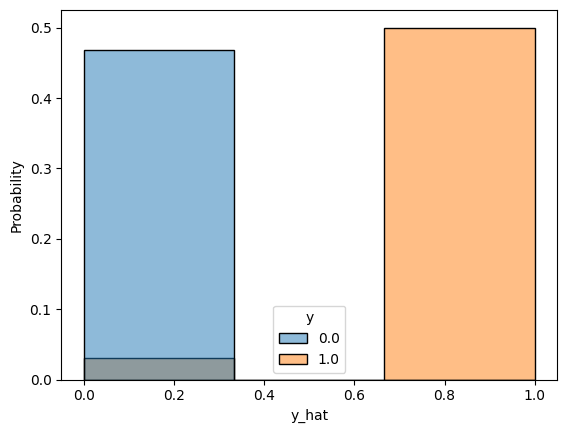

In [29]:
# 이진 분류결과의 예측 확률 분포를 실제 정답별로 시각화
df = pd.DataFrame(
    torch.cat([y[2], y_hat], dim=1) #실제값(y)와 예측확률(y_hat)을 열 방향(dim=1)로 병합
    .detach()                       #autograd 그래프에서 분리
    .numpy(),                       # pytorch Tensor-> numpy 배열 반환
    columns=['y', 'y_hat']          # 실제값 컬럼, 예측확률 컬럼 이름지정
)

sns.histplot(
    df,             # 데이터는 df
    x='y_hat',      # x축은 모델이 예측한 확률가뵤
    hue='y',        # 색상 구분 기준 : 실제 클래스 (0/1)
    bins=3,        # 히스토그램 막대 개수 50개
    stat='probability'  #빈도를 확률(비율)로 정규화
)

plt.show()

In [31]:
# 모델의 확률 기반 분류 성능을 종합적으로 측정하는 지표 (AUC) 계산
from sklearn.metrics import roc_auc_score # ROC 곡선 (아래에 면적 AUC) 계산 함수

roc_auc_score(
    df.values[:, 0],    # 실제 정답 레이블(0/1)
    df.values[:, 1]   # 예측 확률 값 (y_hat: 0~1)
    )

1.0

ROC 곡선: 분류 모델의 판단 기준(thershold)를 바꿔가면서 진짜 양성(True Positive)과 거짓 양성(False Positive)의 관계를 그린 곡선

=> 확률 기준을 느슨하게 / 엄격하게 바꿨을때 맞추는 비율과 잘못 맞추는 비율이 어떻게 변하는가를 확인한다.

AUC(ROC 곡선 아래 면적) 지표 확인

0.5-> 랜덤 추측 정도

1.0 -> 완벽한 분류

값이 클수록 클래스 분리 능력이 좋다